<a href="https://colab.research.google.com/github/Dhruvilpatel04/AI_LAB_notebooks/blob/main/AI_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/archive/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.value_counts('output')

output
1    165
0    138
dtype: int64

In [ ]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
X = data.drop('output',axis =1)
Y = data['output']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,  random_state = 0, stratify=Y)
print(ytrain.mean(),ytest.mean())

0.5462555066079295 0.5394736842105263


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

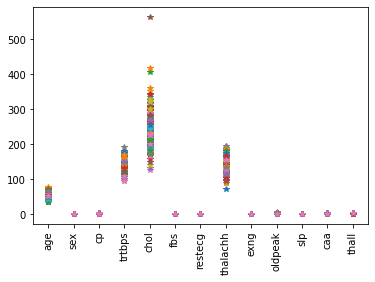

In [ ]:
plt.plot(xtrain.T , '*');
plt.xticks(rotation = 'vertical')

In [ ]:
xnew_train = xtrain.apply(pd.cut, bins =2 , labels = [1,0]).values
# converting it into binary

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

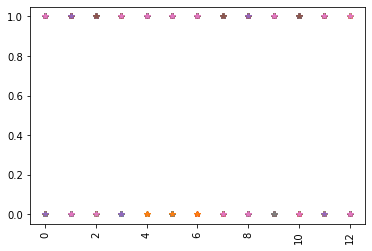

In [ ]:
plt.plot(xnew_train.T , '*');
plt.xticks(rotation = 'vertical')

In [ ]:
xnew_test = xtest.apply(pd.cut, bins =2 , labels = [1,0]).values

In [ ]:
for b in range(xnew_train.shape[1] +1):
  ypred = []
  acc_rows = 0
  for x,y in zip(xnew_train,ytrain):
    pred = (np.sum(x) >= b)
    ypred.append(pred)
    acc_rows+= (y==pred)
  print(b, acc_rows/xnew_train.shape[0])


0 0.5462555066079295
1 0.5462555066079295
2 0.5462555066079295
3 0.5462555066079295
4 0.5462555066079295
5 0.5462555066079295
6 0.5374449339207048
7 0.5418502202643172
8 0.5506607929515418
9 0.5418502202643172
10 0.4977973568281938
11 0.4845814977973568
12 0.46255506607929514
13 0.45374449339207046


In [ ]:
b = 8
ypred =[]
for x in xnew_test:
  pred = (np.sum(x) >=b)
  ypred.append(pred)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.5657894736842105

In [ ]:
class MPneuron:
  def __init__(self):
    self.b = None

  def model(self,x):
    return (np.sum(x)>=self.b)

  def predict(self , X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return (np.array(Y))

  def fit(self , X,Y):
    accuracy = {}
    for b in range(X.shape[1]+1):
      self.b = b
      pred = self.predict(X)
      accuracy[self.b] = accuracy_score(pred , Y)
    best_b = max(accuracy , key = accuracy.get)
    self.b = best_b
    print("optimal value of b is ",best_b)
    print("max accuracy" , accuracy[best_b])




In [ ]:
model = MPneuron()
model.fit(xnew_train , ytrain)

optimal value of b is  8
max accuracy 0.5506607929515418


In [ ]:
ypred = model.predict(xnew_test)
print(accuracy_score(ytest,ypred))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = data.drop('output', axis =1)
Y = data['output']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y , random_state = 0 , stratify = Y)

In [ ]:
xtrain = xtrain.values
xtest = xtest.values

In [ ]:
class Perceptron:
  def _int_(self):
      self.w=None
      self.b=None

  def model(self,x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
      Y=[]
      for x in X:
        res=self.model(x)
        Y.append(res)
      return(np.array(Y))

  def fit(self,X,Y,epoches = 1000,lr = 0.01):
      self.w=np.ones(X.shape[1])
      self.b=0
      accuracy = {}
      max_acc = 0
      for i in range(epoches):
        for x,y in zip(X,Y):
          pred=self.model(x)
          if y==1 and pred==0:
            self.w=self.w + lr*x
            self.b=self.b - lr*1
          elif y==0 and pred==1:
            self.w=self.w - lr*x
            self.b=self.b + lr*1

      accuracy[i] = accuracy_score(self.predict(X) , Y)
      if accuracy[i] > max_acc:
        max_acc = accuracy[i]
        print(accuracy)
      print(max_acc)


In [ ]:
model = Perceptron()
model.fit(xtrain,ytrain)

{999: 0.7841409691629956}
0.7841409691629956


In [ ]:
accuracy_score(model.predict(xtest) , ytest)

0.8289473684210527